In [ ]:
# Метод опорных векторов

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [10]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

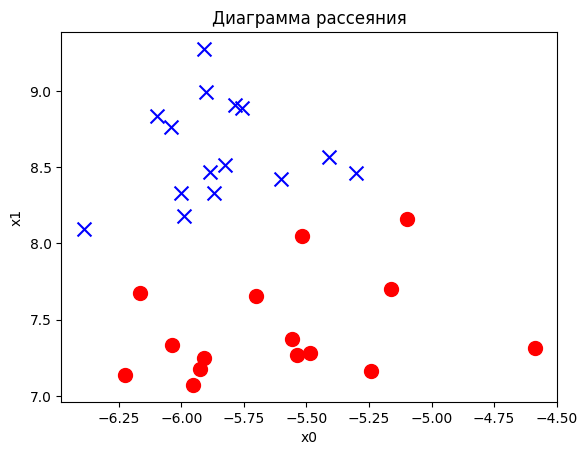

In [11]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [12]:
from sklearn.svm import SVC

In [13]:
svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)

SVC(C=100, kernel='linear')

In [16]:
svm_linear.coef_

np.float64(-2.4992079289682394)

In [15]:
svm_linear.intercept_

array([-64.2533988])

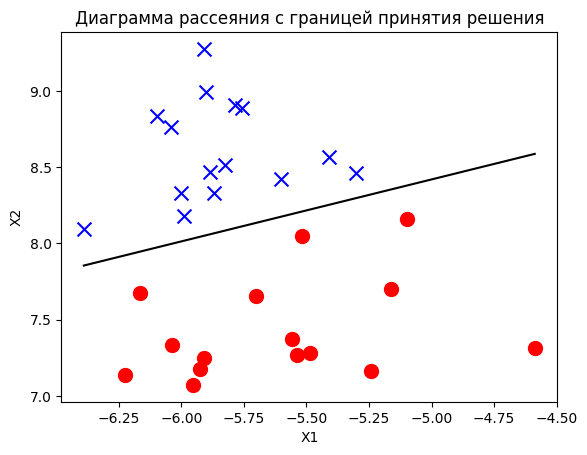

In [17]:
X2 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])

plt.plot(X2, -svm_linear.intercept_[0] / svm_linear.coef_[0][1] - svm_linear.coef_[0][0] / svm_linear.coef_[0][1] * X2, c='k')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c границей принятия решения")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [18]:
svm_linear.support_vectors_

array([[-5.51629264,  8.04763857],
       [-5.30025769,  8.46071981],
       [-5.9879581 ,  8.18112559]])

In [19]:
svm_linear.support_

array([ 0,  8, 29], dtype=int32)

In [20]:
X

array([[-5.51629264,  8.04763857],
       [-6.03989846,  8.76108988],
       [-5.53647888,  7.26932177],
       [-5.90036714,  8.99683108],
       [-5.48509529,  7.28269814],
       [-5.70366816,  7.65603476],
       [-5.55882104,  7.37227395],
       [-5.78655286,  8.90615759],
       [-5.30025769,  8.46071981],
       [-5.75777193,  8.88900351],
       [-6.0001514 ,  8.33197242],
       [-5.60296911,  8.42214089],
       [-5.09958017,  8.15757853],
       [-6.09662219,  8.83310007],
       [-5.16156065,  7.69961463],
       [-5.88654015,  8.47190522],
       [-6.1646084 ,  7.67258513],
       [-6.38992615,  8.09639207],
       [-5.92382954,  7.17799146],
       [-5.24291525,  7.16201747],
       [-5.90848249,  9.27626087],
       [-6.22605199,  7.13457451],
       [-5.4098797 ,  8.56999432],
       [-5.86809486,  8.33179111],
       [-5.90888825,  7.24564295],
       [-4.5878281 ,  7.31380927],
       [-5.82532162,  8.51439355],
       [-5.95237973,  7.07190486],
       [-6.03724242,

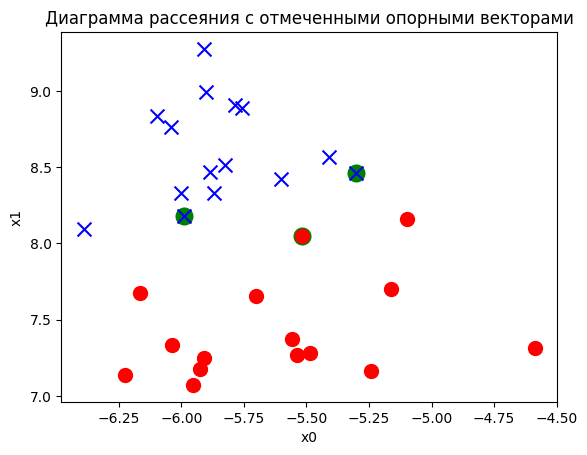

In [21]:
plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c отмеченными опорными векторами")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

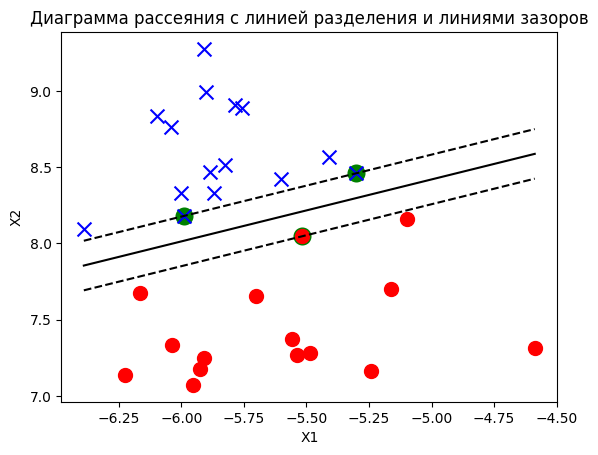

In [22]:
plt.plot(X2, -svm_linear.intercept_[0] / svm_linear.coef_[0][1] - svm_linear.coef_[0][0] / svm_linear.coef_[0][1] * X2, c='k')

plt.plot(X2, (-svm_linear.intercept_[0] - 1) / svm_linear.coef_[0][1] - svm_linear.coef_[0][0] / svm_linear.coef_[0][1] * X2, linestyle='--', c='k')
plt.plot(X2, (-svm_linear.intercept_[0] + 1) / svm_linear.coef_[0][1] - svm_linear.coef_[0][0] / svm_linear.coef_[0][1] * X2, linestyle='--', c='k')

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения и линиями зазоров")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

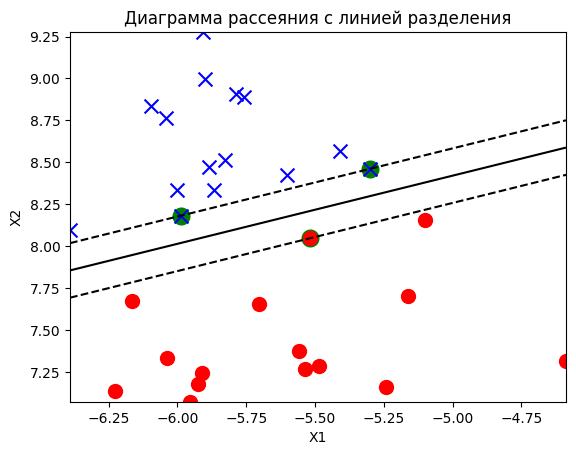

In [23]:
X1 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
X2 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

X1_grid, X2_grid = np.meshgrid(X1, X2)
Z = svm_linear.intercept_[0] + svm_linear.coef_[0][0] * X1_grid +  svm_linear.coef_[0][1] * X2_grid
plt.contour(X1_grid, X2_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [24]:
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

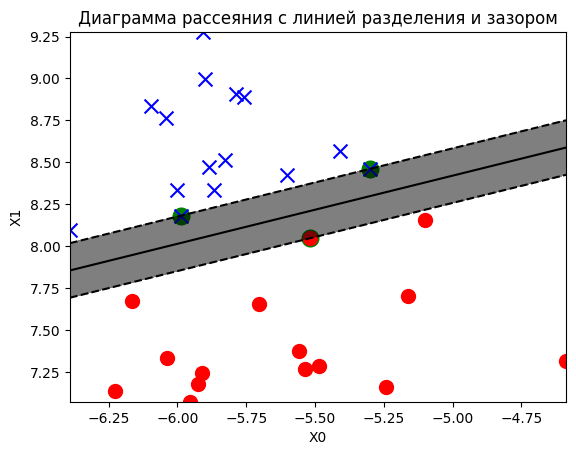

In [25]:
plot_decision_regions(X, y, svm_linear)

In [26]:
y_pred = svm_linear.predict(X)

In [28]:
from sklearn import metrics

In [29]:
metrics.accuracy_score(y, y_pred)

1.0

In [30]:
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

In [80]:
observation_new = [[-5.25, 7.5]]
new_points = [
    [-5.25, 8.25],       
    [-5.25, 7.5],       
    [-5.0, 7.5],
    [-5.0, 8.5],
    [-5.0, 8.75],
]


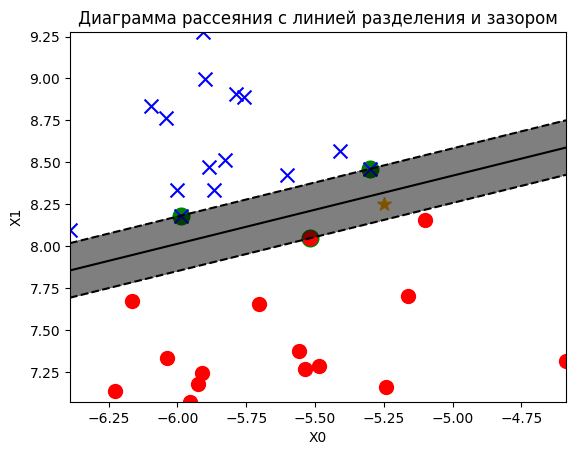

[-0.42119405]
[0]


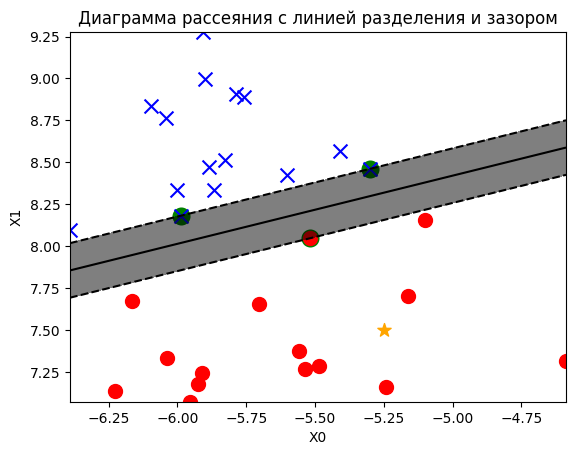

[-5.03131797]
[0]


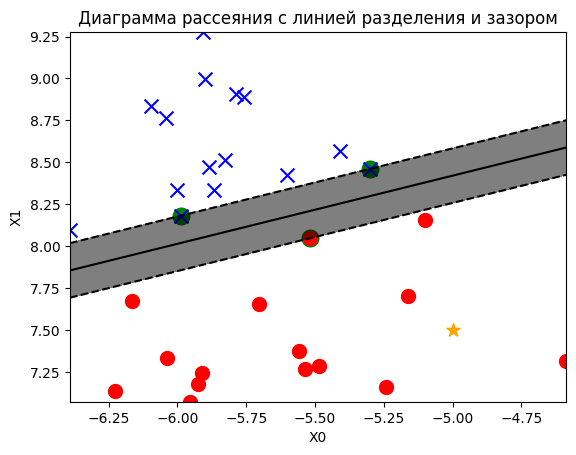

[-5.65611995]
[0]


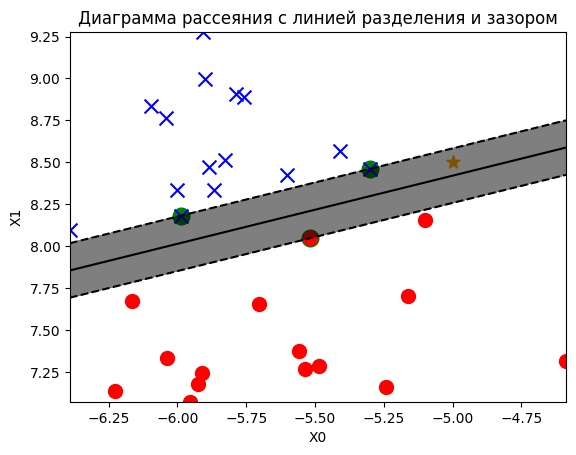

[0.49071194]
[1]


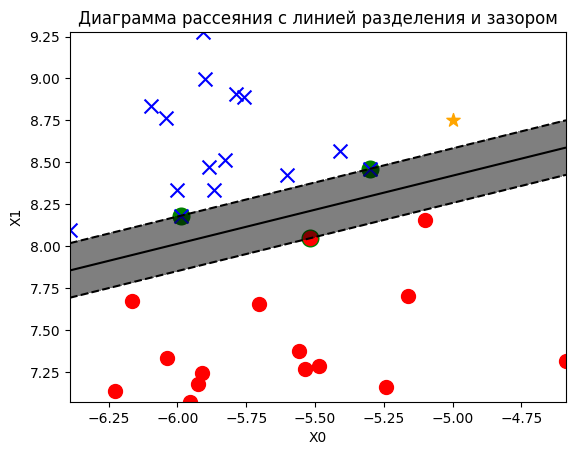

[2.02741991]
[1]


In [86]:
# Самостоятельное 2 В первом задании подвигайте точку нового предсказания. Убедитесь, что с другой стороны границы предсказывается другой класс. Как изменяется предсказание, если точка ляжет внутрь полосы зазора?
for pt in new_points: 
    plt.figure()
    plt.scatter(pt[0], pt[1], marker='*', s=100, color='orange')
    plot_decision_regions(X, y, svm_linear)
    pt = np.array(pt).reshape(1, -1)
    print(svm_linear.decision_function(pt))
    print(svm_linear.predict(pt))

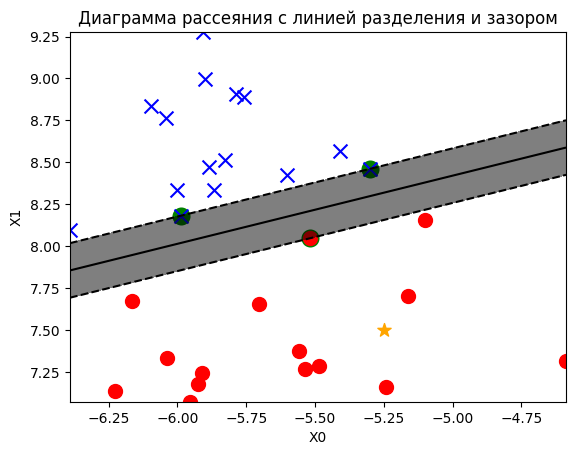

In [32]:
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

In [33]:
svm_linear.decision_function(observation_new)

array([-5.03131797])

In [34]:
svm_linear.predict(observation_new)

array([0])

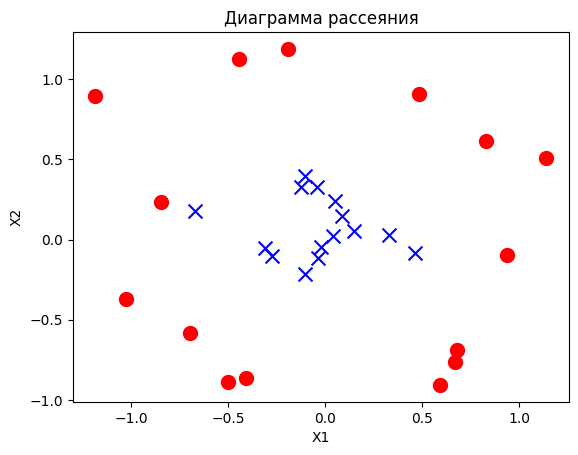

In [93]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [36]:
svm_rbf = SVC(kernel='rbf', C=100).fit(X, y)

In [38]:
svm_rbf.n_support_

array([6, 2], dtype=int32)

In [39]:
svm_rbf.support_

array([11, 20, 21, 23, 28, 29, 25, 27], dtype=int32)

In [41]:
svm_rbf.support_vectors_

array([[ 0.9388294 , -0.09554628],
       [-0.84682371,  0.23287306],
       [-0.19166925,  1.18895776],
       [-0.69539045, -0.58523359],
       [ 0.68060508, -0.68615145],
       [ 0.48354792,  0.91063288],
       [-0.66975235,  0.17866445],
       [ 0.46427295, -0.08540628]])

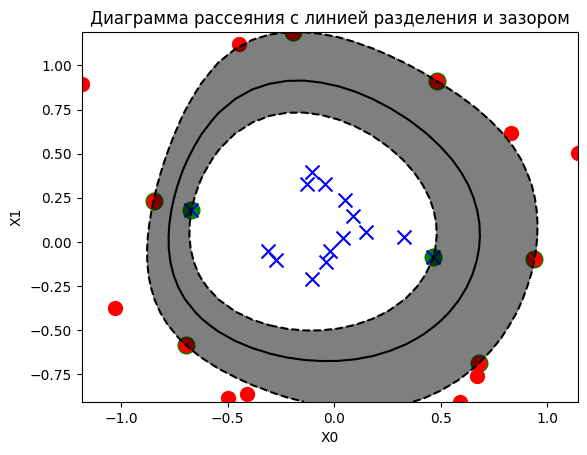

In [42]:
plot_decision_regions(X, y, svm_rbf)

In [46]:
y_pred = svm_rbf.predict(X)
metrics.accuracy_score(y, y_pred)

1.0

In [47]:
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

Kernel = linear: Accuracy = 0.7000 C: 0.01


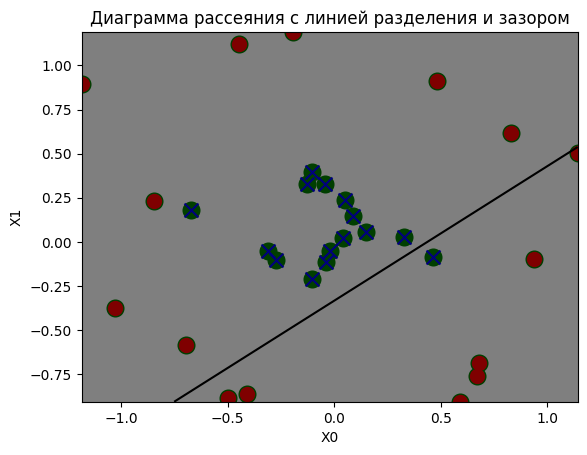

Kernel = linear: Accuracy = 0.7000 C: 0.1


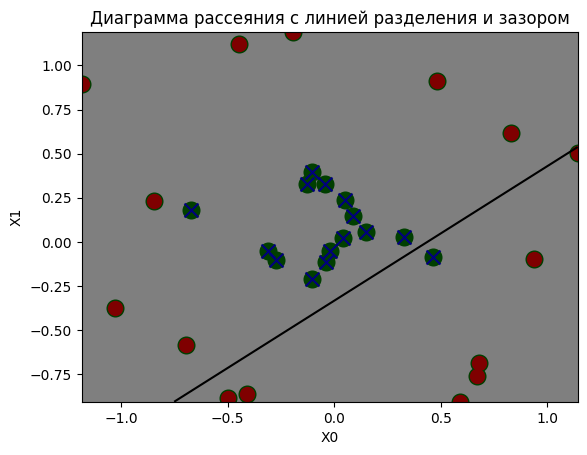

Kernel = linear: Accuracy = 0.7000 C: 1


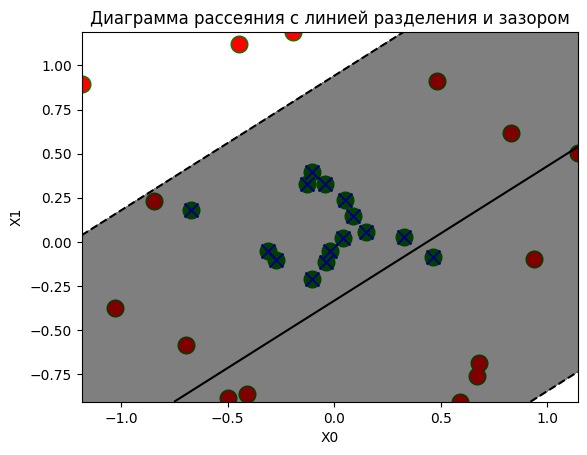

Kernel = linear: Accuracy = 0.7000 C: 10


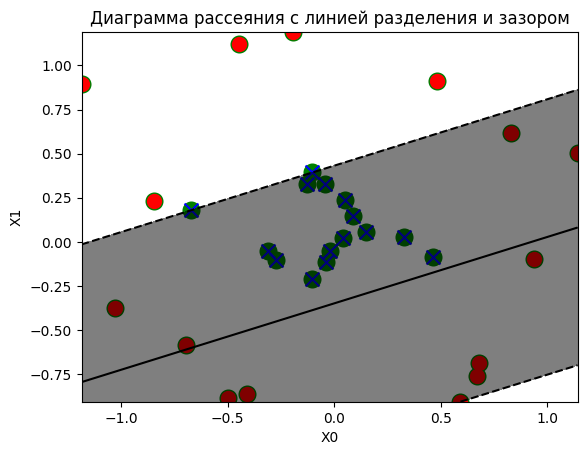

Kernel = rbf: Accuracy = 1.0000 C: 0.01


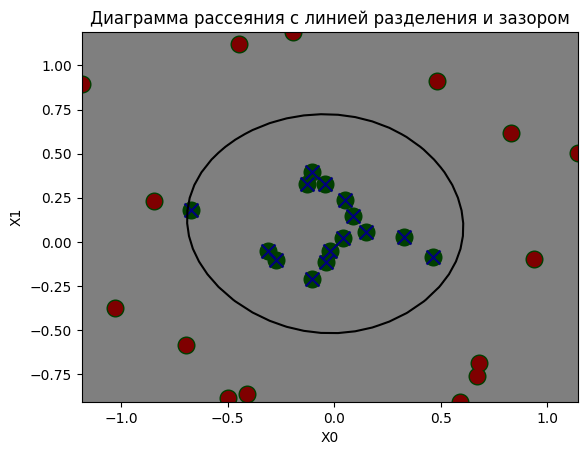

Kernel = rbf: Accuracy = 1.0000 C: 0.1


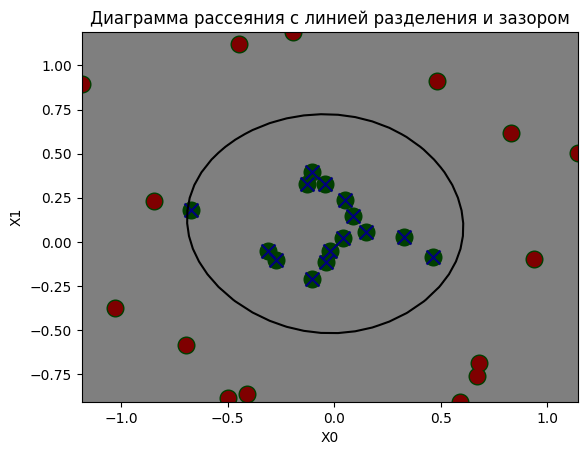

Kernel = rbf: Accuracy = 1.0000 C: 1


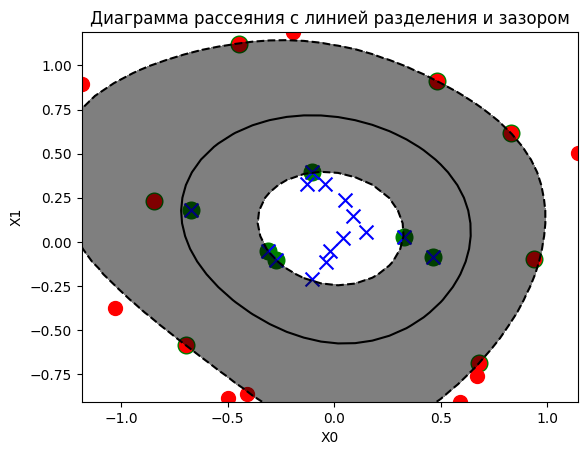

Kernel = rbf: Accuracy = 1.0000 C: 10


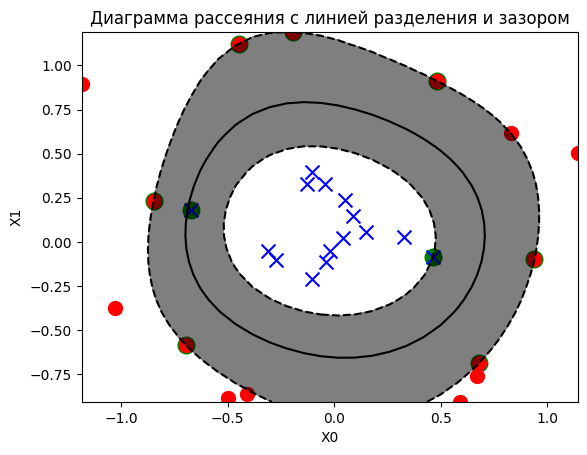

Kernel = poly: Accuracy = 0.6000 C: 0.01


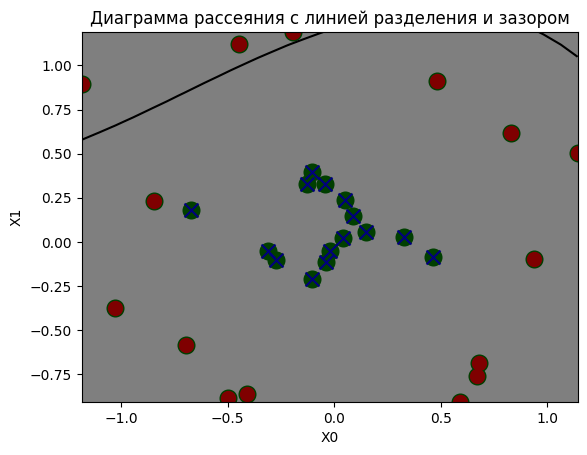

Kernel = poly: Accuracy = 0.6000 C: 0.1


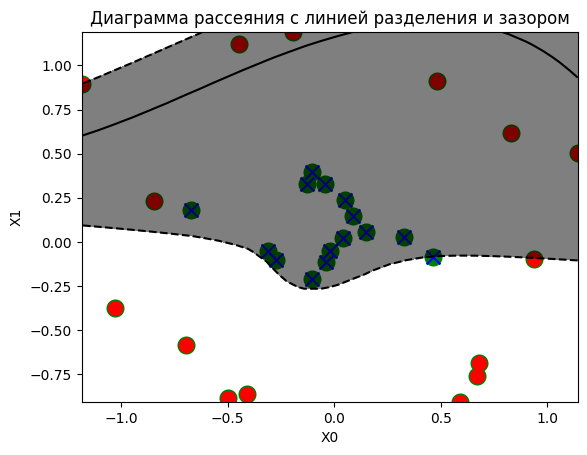

Kernel = poly: Accuracy = 0.7000 C: 1


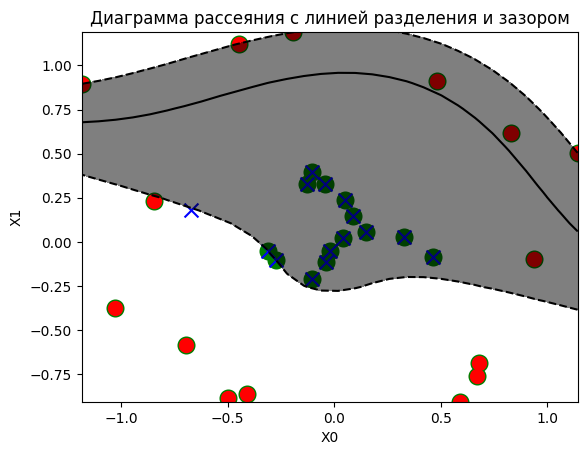

Kernel = poly: Accuracy = 0.7000 C: 10


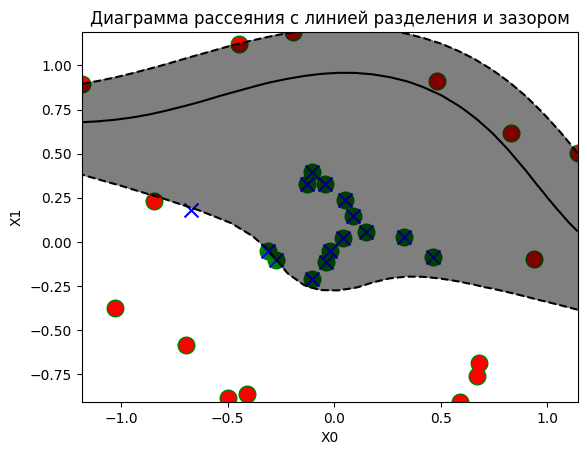

In [95]:
# Самостоятельное 3 Во втором задании повторите анализ с методом опорных векторов с другими видами ядер. Сравните вид границы принятия решения и показатели точности модели.
kernels = ['linear', 'rbf', 'poly']
C_values = [0.01, 0.1, 1, 10]

for ker in kernels:
    for C in C_values:
        if ker == 'poly':
            svm_model = SVC(kernel=ker, degree=3, C=C, random_state=5)
        else:
            svm_model = SVC(kernel=ker, C=C, random_state=5)
        svm_model.fit(X, y)
        y_pred = svm_model.predict(X)
        acc = metrics.accuracy_score(y, y_pred)
        metrics.confusion_matrix(y, y_pred)
        print(f"Kernel = {ker}: Accuracy = {acc:.4f} C: {C}")
        plot_decision_regions(X, y, svm_model)

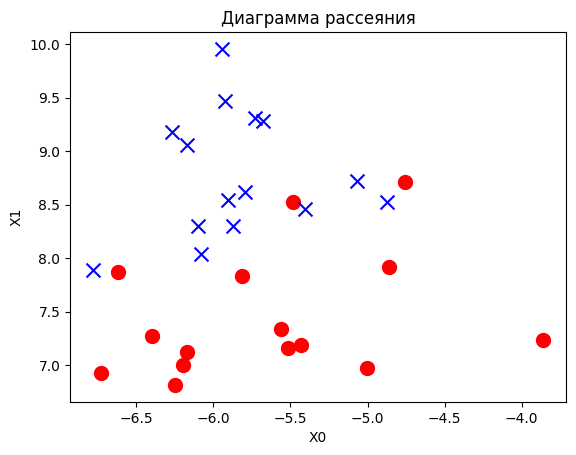

In [89]:
# Мягкий зазор
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

Soft Data, C=0.01: Accuracy = 0.7333


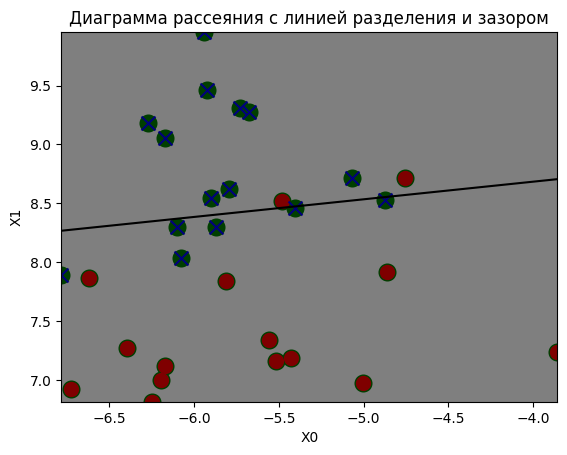

Soft Data, C=0.1: Accuracy = 0.8667


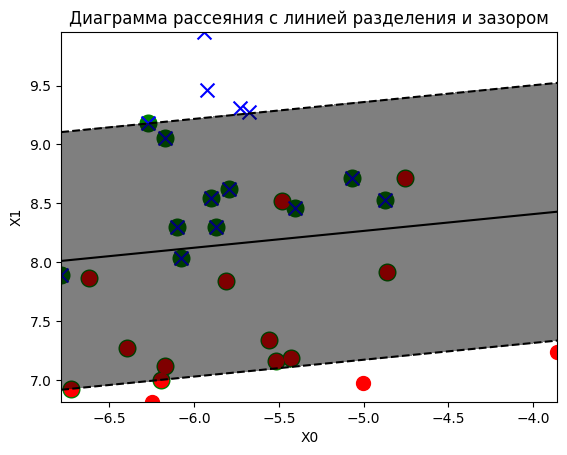

Soft Data, C=1: Accuracy = 0.9000


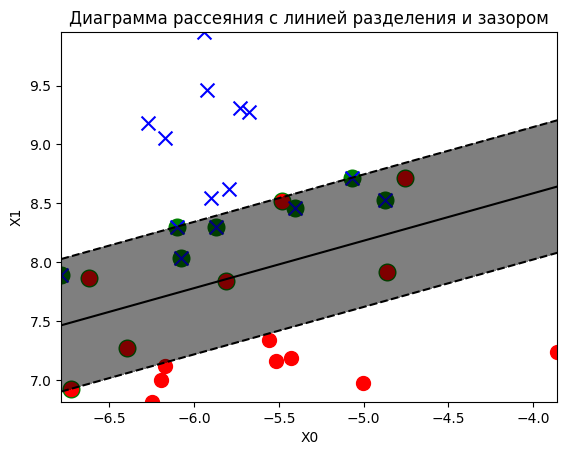

Soft Data, C=10: Accuracy = 0.9000


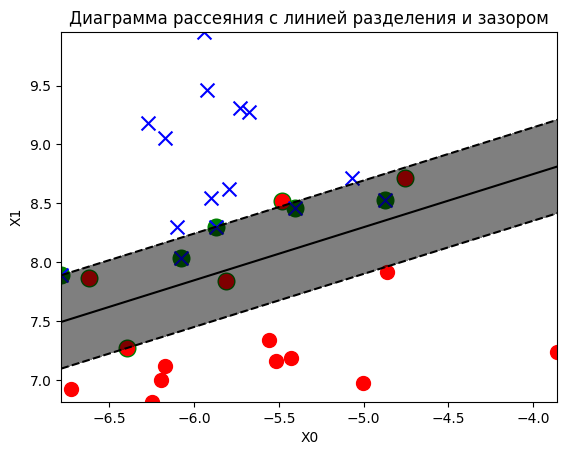

In [92]:
# В третьем задании поэкспериментируйте со значением аргумента C. Сделайтевывод о том, как он влияет на модель.

C_values_soft = [0.01, 0.1, 1, 10]
for C in C_values_soft:
    svm_soft = SVC(kernel='linear', degree=4, C=C)
    svm_soft.fit(X, y)
    acc = metrics.accuracy_score(y, svm_soft.predict(X))
    print(f"Soft Data, C={C}: Accuracy = {acc:.4f}")
    plot_decision_regions(X, y, svm_soft)

In [70]:
svm_linear = SVC(kernel='linear', degree=4, C=.1).fit(X, y)

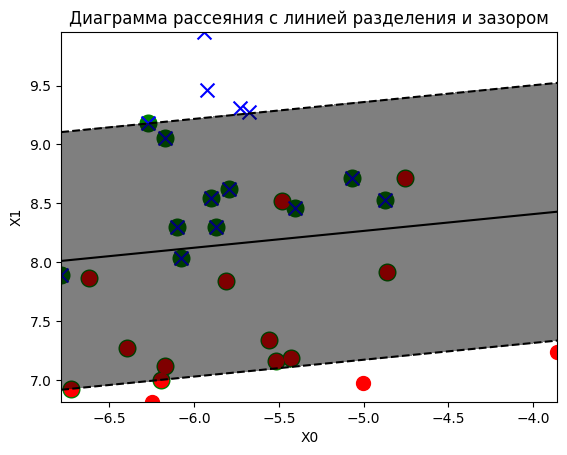

In [71]:
plot_decision_regions(X, y, svm_linear)

In [72]:
svm_linear.n_support_

array([12, 11], dtype=int32)

In [73]:
y_pred = svm_linear.predict(X)
metrics.accuracy_score(y, y_pred)

0.8666666666666667

In [102]:
# Самостоятельное 5 В третьем задании примените классификатор без ядра. Познакомьтесь и примените класс Linear_SVC.
from sklearn.svm import LinearSVC

linear_svc = LinearSVC(max_iter=10000, random_state=5)
linear_svc.fit(X, y)
acc_linear = metrics.accuracy_score(y, linear_svc.predict(X))
print(f"LinearSVC Accuracy: {acc_linear:.4f}")


LinearSVC Accuracy: 0.5667


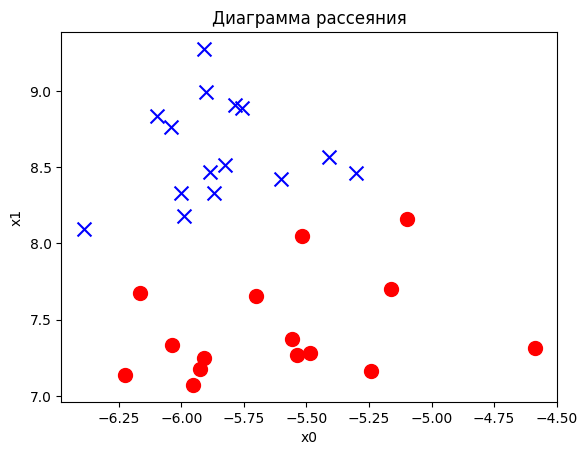

C = 0.01: Accuracy = 1.0000


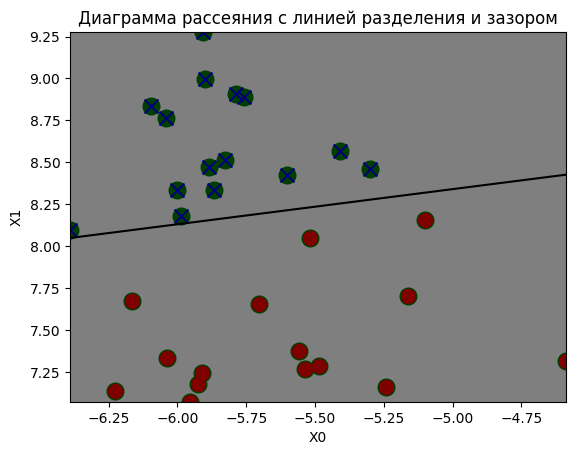

C = 0.1: Accuracy = 0.9667


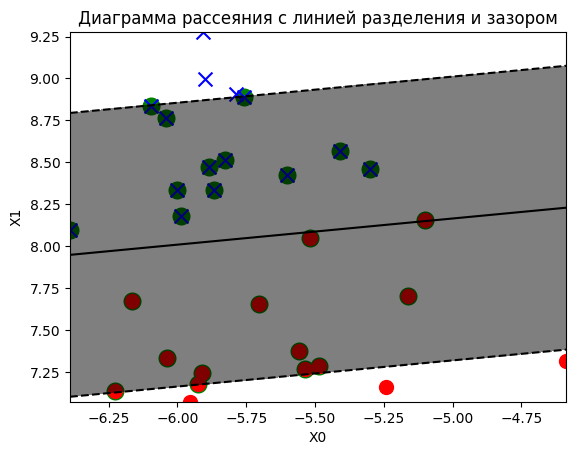

C = 1: Accuracy = 0.9667


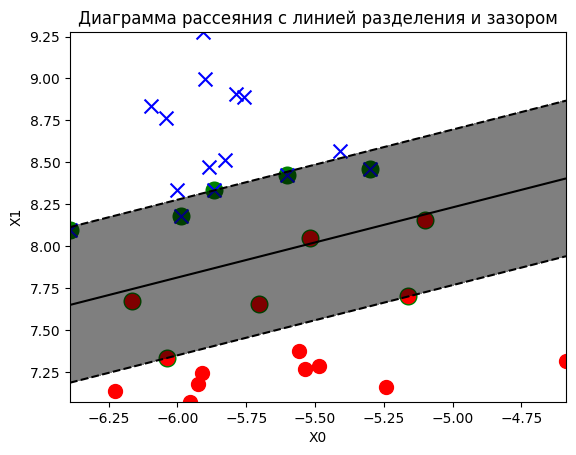

C = 10: Accuracy = 1.0000


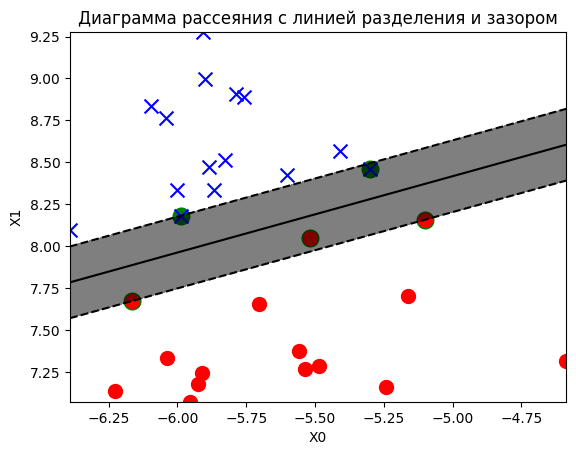

C = 100: Accuracy = 1.0000


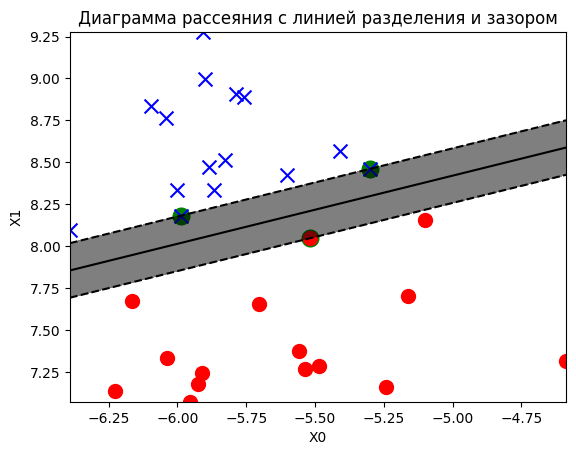

In [75]:
# Самостоятельное 1 В первом задании поэкспериментируйте с различными значениями аргумента C класса SVC. Сделайте вывод о том, как он влияет на модель классификации.
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()


C_values = [0.01, 0.1, 1, 10, 100]
for C in C_values:
    svm_linear = SVC(kernel='linear', C=C, random_state=5)
    svm_linear.fit(X, y)
    y_pred = svm_linear.predict(X)
    acc = metrics.accuracy_score(y, y_pred)
    print(f"C = {C}: Accuracy = {acc:.4f}")
    
    # Вывод границы принятия решения 
    plot_decision_regions(X, y, svm_linear)

In [99]:
# Самостоятельное 6 Сгенерируйте датасет для классификации из 1000 точек и 5 атрибутов. Попробуйте применить метод опорных векторов на нем. Найдите методом подбора наилучшее ядро и значение С.
from sklearn.datasets import make_classification

X_big, y_big = make_classification(n_samples=1000, n_features=5, n_informative=3, n_redundant=1, random_state=42)
best_acc = 0
best_config = None
results_big = []

for ker in ['linear', 'rbf', 'poly']:
    for C in [0.01, 0.1, 1, 10, 100]:
        if ker == 'poly':
            model_big = SVC(kernel=ker, degree=3, C=C, random_state=42)
        else:
            model_big = SVC(kernel=ker, C=C, random_state=42)
        model_big.fit(X_big, y_big)
        acc_big = metrics.accuracy_score(y_big, model_big.predict(X_big))
        results_big.append({"Kernel": ker, "C": C, "Accuracy": acc_big})
        if acc_big > best_acc:
            best_acc = acc_big
            best_config = (ker, C)
        print(f"Kernel={ker}, C={C} -> Accuracy = {acc_big:.4f}\n")

results_big_df = pd.DataFrame(results_big)
print("\nСводная таблица для большого датасета:")
print(results_big_df)
print(f"\nЛучшая конфигурация: Kernel = {best_config[0]}, C = {best_config[1]}, Accuracy = {best_acc:.4f}")


Kernel=linear, C=0.01 -> Accuracy = 0.9160

Kernel=linear, C=0.1 -> Accuracy = 0.9190

Kernel=linear, C=1 -> Accuracy = 0.9150

Kernel=linear, C=10 -> Accuracy = 0.9150

Kernel=linear, C=100 -> Accuracy = 0.9150

Kernel=rbf, C=0.01 -> Accuracy = 0.9180

Kernel=rbf, C=0.1 -> Accuracy = 0.9410

Kernel=rbf, C=1 -> Accuracy = 0.9500

Kernel=rbf, C=10 -> Accuracy = 0.9590

Kernel=rbf, C=100 -> Accuracy = 0.9730

Kernel=poly, C=0.01 -> Accuracy = 0.8900

Kernel=poly, C=0.1 -> Accuracy = 0.9300

Kernel=poly, C=1 -> Accuracy = 0.9310

Kernel=poly, C=10 -> Accuracy = 0.9340

Kernel=poly, C=100 -> Accuracy = 0.9440


Сводная таблица для большого датасета:
    Kernel       C  Accuracy
0   linear    0.01     0.916
1   linear    0.10     0.919
2   linear    1.00     0.915
3   linear   10.00     0.915
4   linear  100.00     0.915
5      rbf    0.01     0.918
6      rbf    0.10     0.941
7      rbf    1.00     0.950
8      rbf   10.00     0.959
9      rbf  100.00     0.973
10    poly    0.01     0.89

n_points = 100: Time = 0.0010 sec
n_points = 500: Time = 0.0055 sec
n_points = 1000: Time = 0.0103 sec
n_points = 5000: Time = 0.2826 sec
n_points = 10000: Time = 1.5092 sec


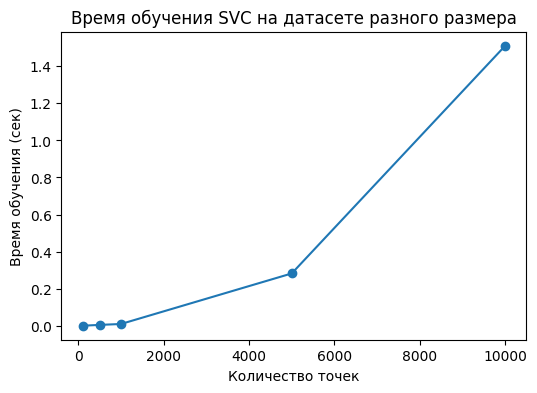

In [100]:
# Самостоятельное 7 Попробуйте данную модель с большим количеством точек. На каком количестве обучение начинает занимать существенное время?
import time

n_points_list = [100, 500, 1000, 5000, 10000]
times = []
for n_points in n_points_list:
    X_large, y_large = make_classification(n_samples=n_points, n_features=5, n_informative=3, n_redundant=1, random_state=42)
    start_time = time.time()
    model_large = SVC(kernel=best_config[0], C=best_config[1], random_state=42)
    model_large.fit(X_large, y_large)
    elapsed = time.time() - start_time
    times.append(elapsed)
    print(f"n_points = {n_points}: Time = {elapsed:.4f} sec")
    
plt.figure(figsize=(6,4))
plt.plot(n_points_list, times, marker='o')
plt.xlabel("Количество точек")
plt.ylabel("Время обучения (сек)")
plt.title("Время обучения SVC на датасете разного размера")
plt.show()
